In [1]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import os
from tqdm import tqdm
from jamo import h2j, j2hcj

from hyperparams import Hyperparams as hp
from datafeeder import DataFeeder
from utils import load_vocab

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
trascript = hp.transcript_pos
lines = codecs.open(trascript, 'r', 'utf-8').readlines()

if not (os.path.isdir(hp.mels_dir)):
    os.mkdir(hp.mels_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mels_dir, hp.mels_dir))
    
if not (os.path.isdir(hp.mags_dir)):
    os.mkdir(hp.mags_dir)
    print('{%s} does not exist, created {%s}'.format(hp.mags_dir, hp.mags_dir))

In [3]:
fnames, texts, secs, text_lengths = [], [], [], []
char2idx, idx2char = load_vocab();

for line in tqdm(lines):
    line = j2hcj(line)
    fname, _, text, sec = line.strip().split('|')
    encodedText = [char2idx[char] for char in text]
    encodedText = np.array(encodedText, np.int32)#.tostring()
    
    fnames.append(fname)
    texts.append(encodedText)
    secs.append(float(sec))
    text_lengths.append(len(encodedText))
    
fnames = np.asarray(fnames)
texts = np.asarray(texts)
secs = np.asarray(secs)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12853/12853 [00:01<00:00, 10376.31it/s]


In [4]:
import sys
del sys.modules['datafeeder']
from datafeeder import DataFeeder

In [5]:
metadata = list(zip(fnames, texts))

In [6]:
import sys
del sys.modules['datafeeder']
from datafeeder import DataFeeder
feeder = DataFeeder(metadata)

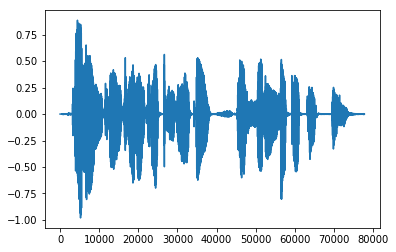

2205
1102
[[-1.0255691e-05+0.00000000e+00j -6.4333976e-06+0.00000000e+00j
   1.7054250e-05+0.00000000e+00j ...  2.5531506e-05+0.00000000e+00j
  -8.3860614e-06+0.00000000e+00j  7.8038620e-06+0.00000000e+00j]
 [-6.6053229e-07-1.64941500e-08j -1.7422068e-05-7.88817488e-06j
  -7.3106719e-05-3.52321658e-05j ... -2.7992644e-05-5.17719673e-05j
   6.8890745e-06+1.41104829e-05j  6.3233756e-06-5.99406030e-06j]
 [ 1.2370940e-05+3.63827866e-08j  2.0574123e-05+1.07083479e-05j
   2.2254254e-04+2.35621210e-05j ...  1.1321703e-05+6.94665141e-05j
  -2.4029101e-05+6.43088242e-06j -6.2665481e-06+7.59307841e-06j]
 ...
 [-3.4736960e-11-8.18059132e-09j  9.0792778e-09+2.75403500e-09j
  -2.9914322e-08+3.69540243e-09j ... -9.2726876e-10-1.61853919e-09j
   4.0300940e-09+3.79184195e-09j -2.0256834e-09+1.98136196e-09j]
 [ 1.0182189e-11+5.79060089e-09j -3.8279158e-10+9.96531746e-10j
  -3.7904067e-09-5.08607290e-09j ... -3.3342771e-09+1.04478155e-10j
  -4.0823869e-10-2.14089790e-09j  7.8411313e-09-1.24605581e-09j]


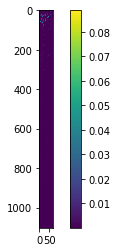

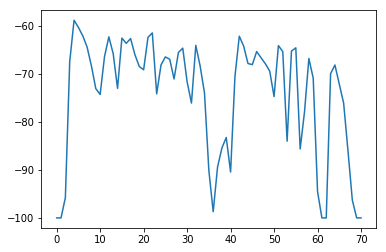

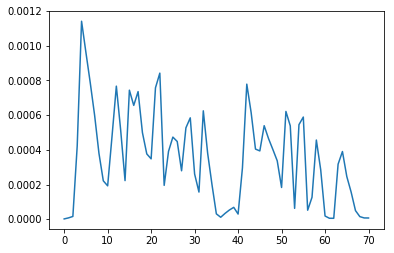

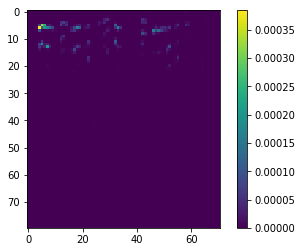

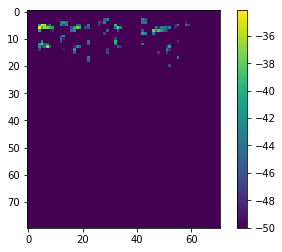

(array([[-50., -50., -50., ..., -50., -50., -50.],
        [-50., -50., -50., ..., -50., -50., -50.],
        [-50., -50., -50., ..., -50., -50., -50.],
        ...,
        [-50., -50., -50., ..., -50., -50., -50.],
        [-50., -50., -50., ..., -50., -50., -50.],
        [-50., -50., -50., ..., -50., -50., -50.]]),
 array([[ -99.7807  , -100.      ,  -95.36335 , ...,  -91.858475,
         -100.      , -100.      ],
        [-100.      ,  -94.36813 ,  -81.81385 , ...,  -84.60431 ,
          -96.08069 , -100.      ],
        [ -98.15192 ,  -92.692474,  -73.00333 , ...,  -83.05063 ,
          -92.084816, -100.      ],
        ...,
        [-100.      , -100.      , -100.      , ..., -100.      ,
         -100.      , -100.      ],
        [-100.      , -100.      , -100.      , ..., -100.      ,
         -100.      , -100.      ],
        [-100.      , -100.      , -100.      , ..., -100.      ,
         -100.      , -100.      ]], dtype=float32),
 array([-100.      , -100.      ,  -9

In [7]:
feeder._load_next()

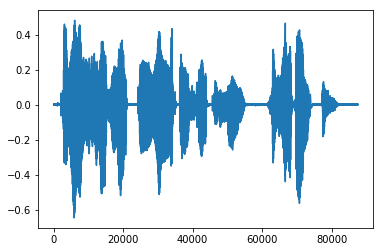

2205
1102
[[-1.0363916e-05+0.0000000e+00j  2.2996373e-05+0.0000000e+00j
  -1.7216547e-04+0.0000000e+00j ... -1.3128545e-07+0.0000000e+00j
   3.1710931e-06+0.0000000e+00j  1.4634108e-05+0.0000000e+00j]
 [-6.5241470e-06-3.3356159e-08j -7.6236669e-05+1.6658931e-05j
  -4.0544441e-05-2.6263855e-04j ... -1.4663523e-06+1.7445922e-05j
  -4.4038434e-06-1.8189176e-05j -3.2040848e-06+3.0807845e-05j]
 [-3.4274333e-05-1.7985467e-07j  2.1745659e-04-1.1014005e-04j
   4.8244579e-04+1.0046468e-04j ...  1.1639644e-06-4.5185229e-06j
   5.7110060e-06+7.0352835e-06j -8.6704886e-06-9.7590128e-06j]
 ...
 [-1.2699962e-11-3.4520966e-09j -1.2865845e-09+6.7596473e-10j
  -4.9445255e-08+6.1081247e-09j ... -1.6177818e-09-8.1542961e-10j
  -2.4782443e-09+2.3142630e-09j -1.4888116e-07+2.0680932e-07j]
 [ 6.8119763e-12+3.2250291e-09j  1.7787840e-09+1.0891870e-09j
   3.2293322e-08-4.3000302e-08j ...  3.7183367e-11+3.1741971e-09j
   2.1476236e-09-6.0712219e-10j -1.9002343e-07-1.6017395e-07j]
 [-1.5513373e-13-6.3451271e-09

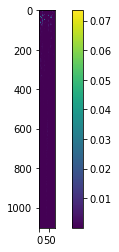

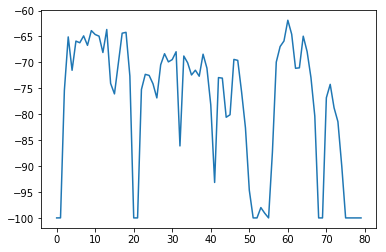

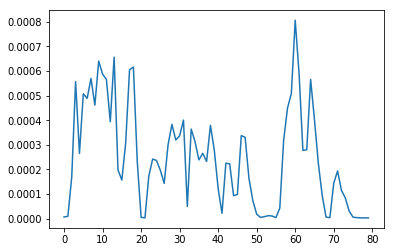

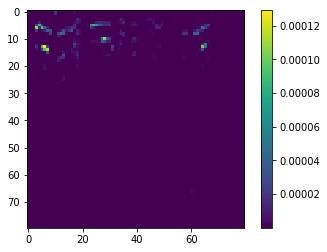

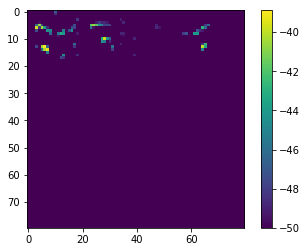

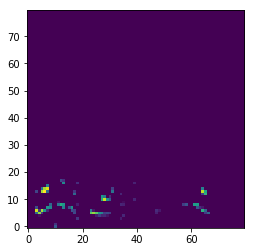

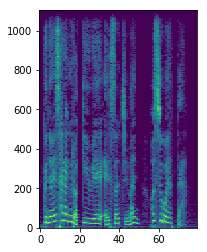

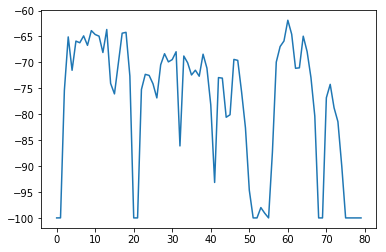

In [8]:
mel, spec, cval = feeder._load_next()
plt.imshow(mel, origin='lower')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(spec, origin='lower')
ax.set_aspect(0.1)
plt.show()
plt.plot(cval)

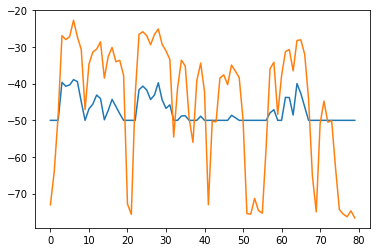

In [9]:
plt.plot(np.max(mel, axis=0))
plt.plot(np.max(spec, axis=0))

In [40]:
import librosa
fpath = os.path.join(hp.data_dir, fnames[0])
wav, fs = librosa.core.load(fpath, mono=True)
nsc = np.int(fs * hp.nsc_sec)
nov = np.int(fs * hp.nov_sec)
mel_ = librosa.feature.melspectrogram(y=wav, n_fft=nsc, hop_length=nov, power=1, n_mels = hp.n_mels)

In [12]:
mel_basis = librosa.filters.mel(fs, nsc, hp.n_mels)  # (n_mels, 1+n_fft//2)

In [14]:
mel_basis.shape

(80, 1103)

In [19]:
linear = librosa.stft(y=wav,
                      n_fft=nsc,
                      hop_length=nov,
                      win_length=nsc)
linear = linear/nsc

# magnitude spectrogram
mag = np.abs(linear)  # (1+n_fft//2, T)

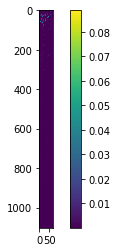

In [20]:
plt.imshow(mag)
plt.colorbar()

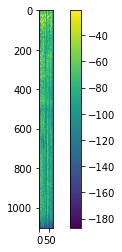

In [23]:
plt.imshow(20 * np.log10(mag))
plt.colorbar()

In [24]:
mel = np.dot(mel_basis, mag)

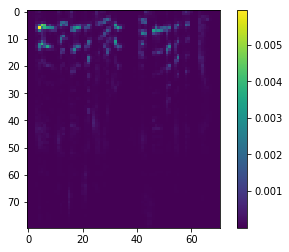

In [25]:
plt.imshow(mel)
plt.colorbar()

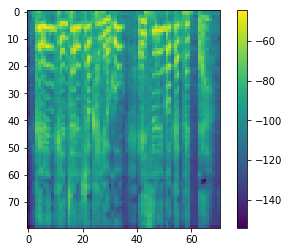

In [45]:
plt.imshow(20 * np.log10(mel))
plt.colorbar()
plt.show()

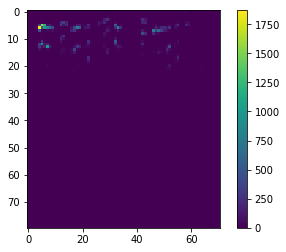

In [35]:
plt.imshow(mel_)
plt.colorbar()

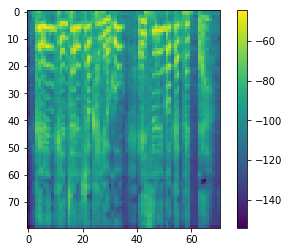

In [44]:
plt.imshow(20*np.log10(mel_/nsc))
plt.colorbar()